In [1]:
!pip install networkx

# 과제: 논문의 공저관계 생성을 위한 전처리

공저 관계가 있는 사람들끼에 대하여 공저한 횟수만큼 1-mode Matrix 생성

참고자료: https://m.blog.naver.com/hallym_adpr/221614800313

In [2]:

#안기석은 송우석과 한 번의 공저 관계가 있었고,
#김희연은 정원훈과 세 개의 논문을 공저하였다면
#아래와 같이 전처리 결과가 나올 것
import pandas as pd
예시결과=pd.read_excel('출력예시.xlsx')
예시결과

,Unnamed: 0,안기석,송우석,김희연,정원훈
0,안기석,-,1,0,0
1,송우석,1,-,0,0
2,김희연,0,0,-,3
3,정원훈,0,0,1,-


논문 제목, 저자들은 Web of Science에서 다운로드 하였음

논문은 구글 스콜라에 공개되어 있는 논문들이므로 몇 개 공개링크를 걸어두자면...


Selective AuCl3 doping of graphene for reducing contact resistance of graphene devices
https://www.sciencedirect.com/science/article/pii/S0169433217323115

Cyp7a1 is continuously increased with disrupted Fxr-mediated feedback inhibition in hypercholesterolemic TALLYHO/Jng mice
https://www.sciencedirect.com/science/article/pii/S1388198117301749

Melamine-modified silicotungstic acid incorporated into the polyvinyl alcohol/polyvinyl amine blend membrane for pervaporation dehydration of water/isopropanol mixtures
https://www.sciencedirect.com/science/article/pii/S0042207X17311788

논문들은 전부 구글 스콜라에 공개되어 있지만 데이터의 생김새만 공유하겠습니다.

In [3]:
import pandas as pd
sample=pd.read_excel('공저관계.xlsx')
sample[['제목','원내참여자 성명']].head()

,제목,원내참여자 성명
0,Selective AuCl3 doping of graphene for reducin...,"안기석, 송우석"
1,Cyp7a1 is continuously increased with disrupte...,"김희연, 정원훈, 이상달, 김기영, 안성훈, 성혜림, 이은아, 이동인"
2,Melamine-modified silicotungstic acid incorpor...,"박유인, 남승은"
3,Superior Toughness and Fast Self-Healing at Ro...,"제갈종건, 황성연, 박제영, 오동엽, 박슬아, 김선미, 전현열, 신성호"
4,Enhanced stability of Co catalysts supported o...,"장태선, 허일정, 박정현, 강태진, 여수연"


In [4]:
# 공저관계만 파악할 것이기 때문에 논문 제목은 불러들이지 않았습니다.

author=pd.read_excel('공저관계.xlsx',usecols='D') # 엑셀로부터 파일 불러들이기
author.tail()

,원내참여자 성명
1400,"김정훈, 공창인, 박채영"
1401,김정훈
1402,백진욱
1403,백진욱
1404,백진욱


In [5]:
# 데이터프레임을 콤마 단위로 split하여 쪼갰습니다.
# 데이터프레임을 list로 변환해야 처리할 수 있습니다.
autors_list=list(author['원내참여자 성명'].apply(lambda x: x.split(', ')))
autors_list[:5] # 5개만 셈플로 출력

[['안기석', '송우석'],
 ['김희연', '정원훈', '이상달', '김기영', '안성훈', '성혜림', '이은아', '이동인'],
 ['박유인', '남승은'],
 ['제갈종건', '황성연', '박제영', '오동엽', '박슬아', '김선미', '전현열', '신성호'],
 ['장태선', '허일정', '박정현', '강태진', '여수연']]

In [26]:
# 위의 2차원 list를 1차원 풀어해친다음 집합형 데이터인 set으로 변환하는 과정입니다.
# 이 부분은 공저 관계 확인하는 코드에 필요하게 됩니다.
splited_author=author['원내참여자 성명'].str.split(', ')
splited_author=splited_author.apply(lambda x: pd.Series(x))
splited_author=splited_author.stack()
splited_author=splited_author.droplevel(level=1)
unique_authors=list(set(splited_author.tolist()))
len(unique_authors), unique_authors
while '' in unique_authors:
    unique_authors.remove('')
unique_authors[:5], len(unique_authors)

(['임종선', '송예진', '이지훈', '주지영', '김재곤'], 1005)

In [27]:
# 위 list를 dicionary로 변환

author2id = {w: i for i, w in enumerate(unique_authors)}
len(author2id)

1005

Dictionary로 변환하여 번호를 부여한 이유는 for문 돌릴 때 편하게 matrix 행렬 좌표에 활용하기 위함입니다.

In [10]:
import numpy as np
adjacent_matrix=np.zeros((1005,1005), int)
for authors in autors_list:
    for wi, i in author2id.items():
        if wi in authors:
            for wj, j in author2id.items():
                if i != j and wj in authors:
                    adjacent_matrix[i][j] += 1
df=pd.DataFrame(adjacent_matrix, columns=unique_authors)

In [11]:
df=df.T
df.columns=unique_authors
df.to_excel('논문 공저.xlsx')
df

,임종선,송예진,이지훈,주지영,김재곤,신원석,서상완,조선행,박종목,전효진,...,김소영,전강혁,오지영,김동우,유영우,정평근,Ali Imran,백진욱,이수복,황진수
임종선,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
송예진,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
이지훈,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
주지영,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
김재곤,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
정평근,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ali Imran,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
백진욱,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
이수복,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 여기까지 끝

# 아래 내용은 시각화입니다.

워낙 많은 수의 저자들이 엮여있다 보니 제대로 나오지 않습니다.

사실상 모자이크이며 제꺼 보지 마시고 참고자료 보세요~

In [28]:
author2id = {w: i for i, w in enumerate(unique_authors)}
len(author2id)

1005

In [13]:
import re
import networkx as nx
network = nx.from_numpy_matrix(adjacent_matrix)
list(network.adjacency())

[(0,
  {3: {'weight': 1},
   34: {'weight': 1},
   57: {'weight': 3},
   103: {'weight': 1},
   104: {'weight': 1},
   133: {'weight': 1},
   189: {'weight': 1},
   202: {'weight': 22},
   239: {'weight': 3},
   311: {'weight': 4},
   318: {'weight': 1},
   320: {'weight': 25},
   326: {'weight': 1},
   327: {'weight': 9},
   328: {'weight': 1},
   337: {'weight': 1},
   360: {'weight': 11},
   423: {'weight': 4},
   447: {'weight': 5},
   458: {'weight': 4},
   474: {'weight': 2},
   485: {'weight': 1},
   514: {'weight': 2},
   550: {'weight': 22},
   586: {'weight': 2},
   594: {'weight': 9},
   597: {'weight': 1},
   670: {'weight': 1},
   678: {'weight': 1},
   690: {'weight': 8},
   737: {'weight': 1},
   835: {'weight': 2},
   878: {'weight': 4},
   937: {'weight': 2},
   942: {'weight': 24},
   947: {'weight': 1},
   955: {'weight': 11},
   983: {'weight': 7},
   988: {'weight': 2},
   992: {'weight': 1}}),
 (1,
  {161: {'weight': 1},
   180: {'weight': 1},
   215: {'weight': 1

In [14]:
galexy_id2word={i: w for i, w in enumerate(unique_authors)}

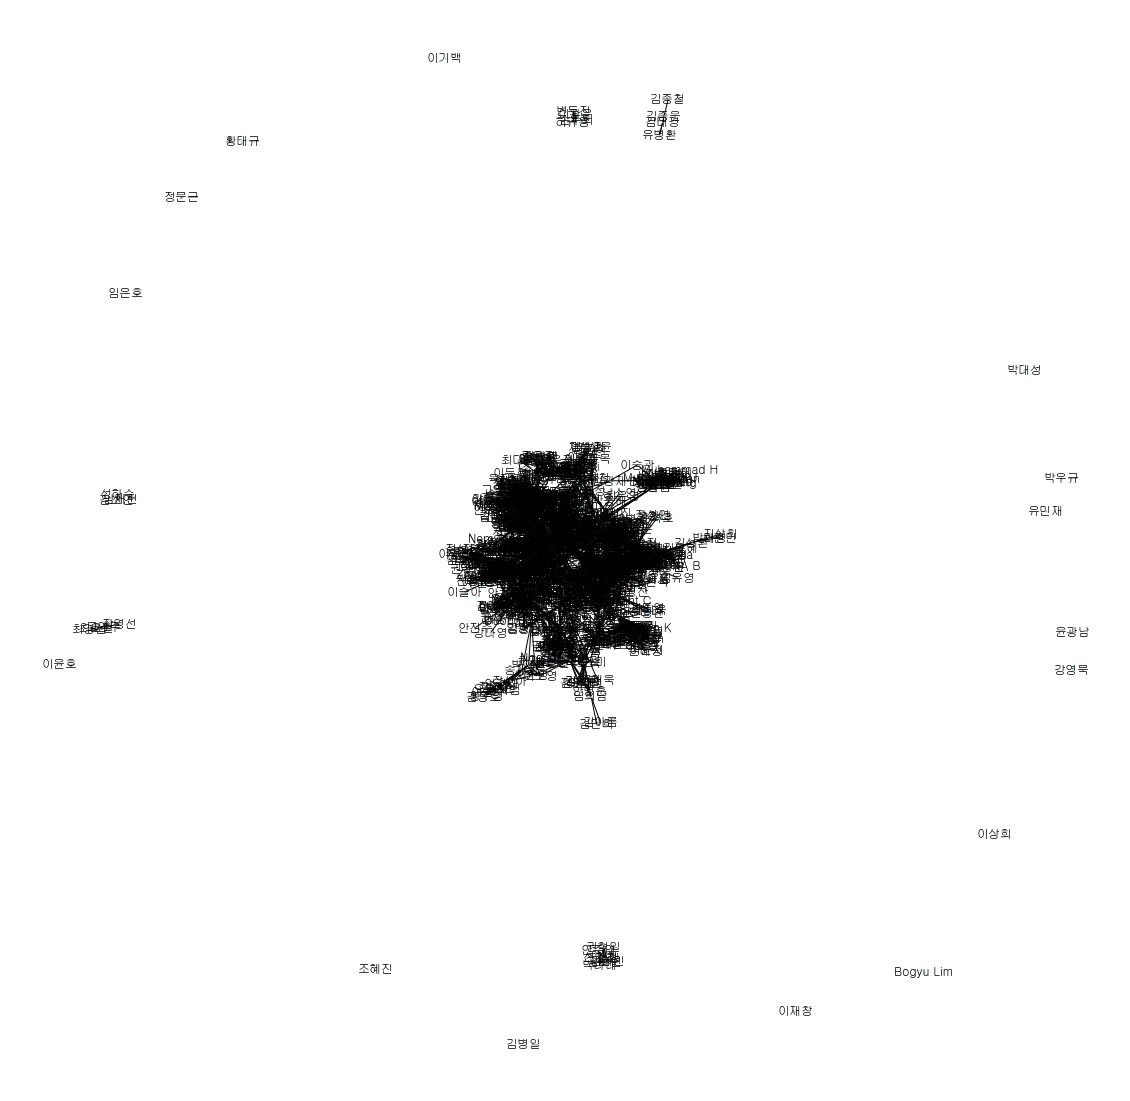

In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/fonts/Gulim.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2
}
nx.draw(network, labels=galexy_id2word, font_family=font_name, ax=ax, **option)

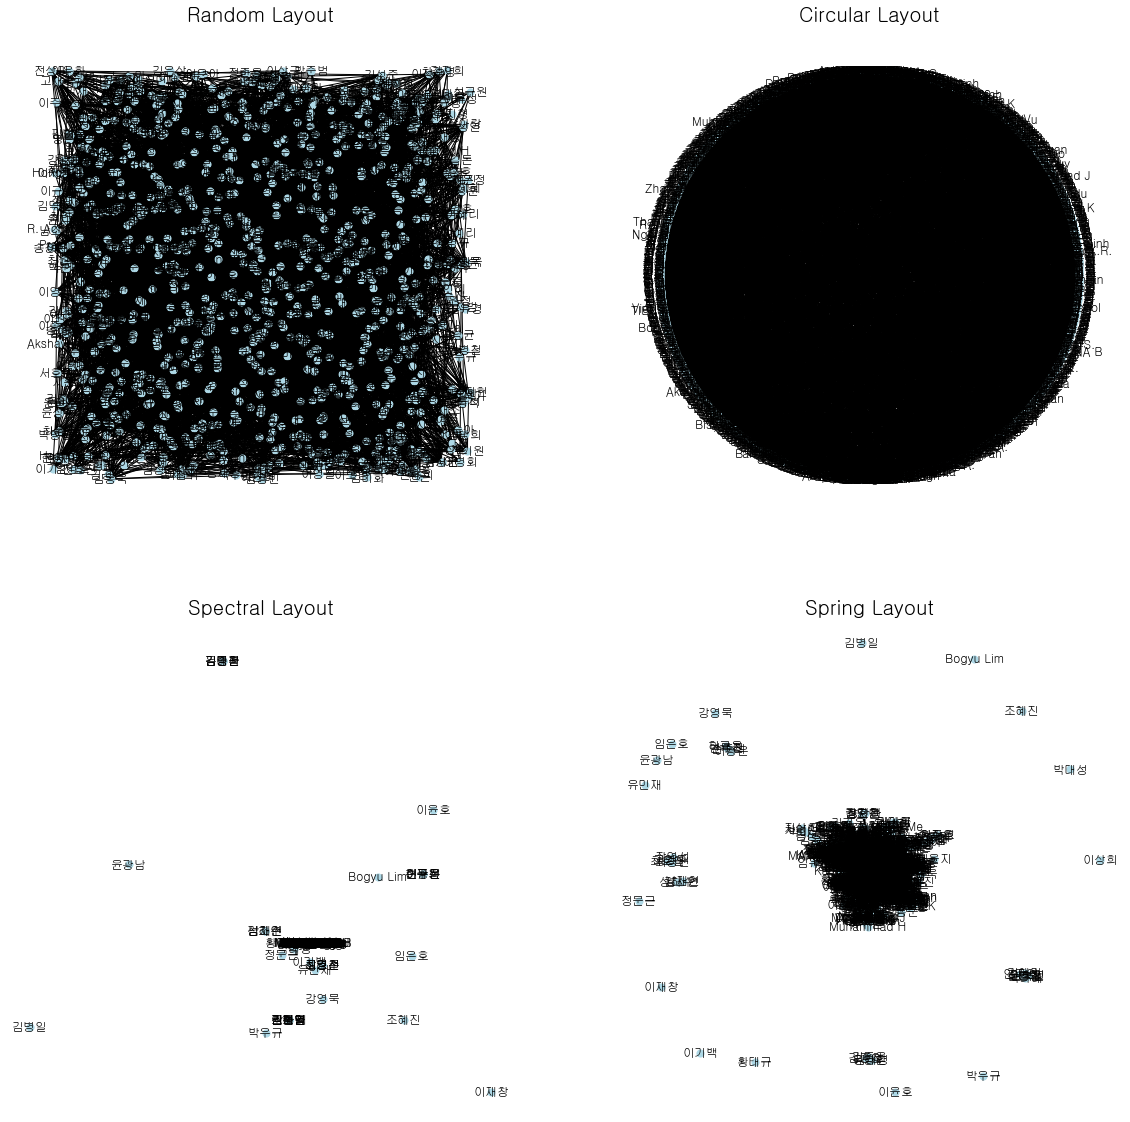

In [18]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 50,
}

plt.subplot(221)
plt.title('Random Layout', fontsize=20)
nx.draw_random(network, labels=galexy_id2word, font_family=font_name, **option)
plt.subplot(222)
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(network, labels=galexy_id2word, font_family=font_name, **option)
plt.subplot(223)
plt.title('Spectral Layout',fontsize=20)
nx.draw_spectral(network, labels=galexy_id2word, font_family=font_name, **option)
plt.subplot(224)
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(network, labels=galexy_id2word, font_family=font_name, **option)